In [83]:
import pandas as pd
import numpy as pn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [84]:
df = pd.read_csv('/content/mall customers.csv - mall customers.csv.csv')

In [85]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
df.drop('CustomerID', axis=1, inplace=True)

In [87]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [88]:
df.rename(columns={'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'scores'}, inplace=True)

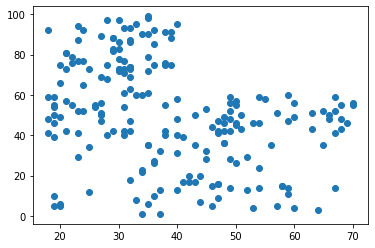

In [89]:
plt.scatter(df.age, df.scores)

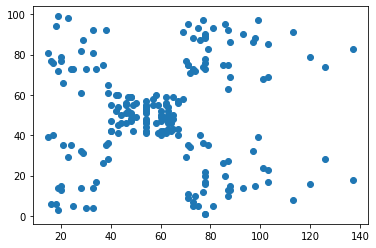

In [90]:
plt.scatter(df.income, df.scores)

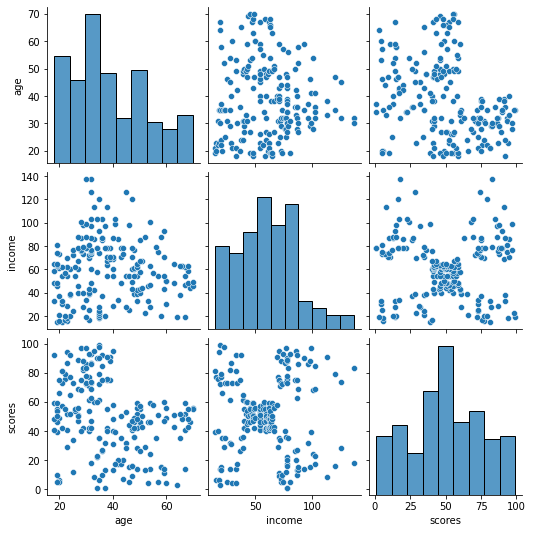

In [91]:
sns.pairplot(df[['age','income','scores']])

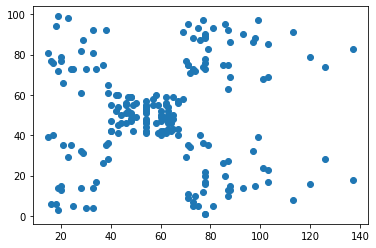

In [92]:
plt.scatter(df.income, df.scores)

In [93]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=.20)

In [94]:
train.to_csv('train data.csv')

In [95]:
import sklearn.cluster as cluster

In [96]:
kmean1 = cluster.KMeans()

In [97]:
kmean1.fit(df[['income','scores']])

KMeans()

In [98]:
kmean1.predict(df[['income','scores']])

array([6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 1, 0, 1, 1,
       6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 4, 7, 5, 7, 4, 7, 4, 7,
       5, 7, 4, 7, 4, 7, 4, 7, 4, 7, 5, 7, 4, 7, 5, 7, 4, 7, 4, 7, 4, 7,
       4, 7, 4, 7, 4, 7, 5, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7,
       4, 7, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [99]:
df['predicted cluster'] = kmean1.predict(df[['income', 'scores']])

In [100]:
df.head()

,Gender,age,income,scores,predicted cluster
0,Male,19,15,39,6
1,Male,21,15,81,0
2,Female,20,16,6,6
3,Female,23,16,77,0
4,Female,31,17,40,6


In [101]:
df.tail()

,Gender,age,income,scores,predicted cluster
195,Female,35,120,79,2
196,Female,45,126,28,3
197,Male,32,126,74,2
198,Male,32,137,18,3
199,Male,30,137,83,2


In [102]:
center1 = kmean1.cluster_centers_

In [103]:
center1

array([[ 25.0952381 ,  80.04761905],
       [ 46.56097561,  50.95121951],
       [108.18181818,  82.72727273],
       [109.7       ,  22.        ],
       [ 79.73913043,  13.39130435],
       [ 63.15555556,  47.31111111],
       [ 25.14285714,  19.52380952],
       [ 78.03571429,  81.89285714]])

In [104]:
df0 = df[df['predicted cluster'] == 0]
df1 = df[df['predicted cluster'] == 1]
df2 = df[df['predicted cluster'] == 2]
df3 = df[df['predicted cluster'] == 3]
df4 = df[df['predicted cluster'] == 4]
df5 = df[df['predicted cluster'] == 5]
df6 = df[df['predicted cluster'] == 6]
df7 = df[df['predicted cluster'] == 7]

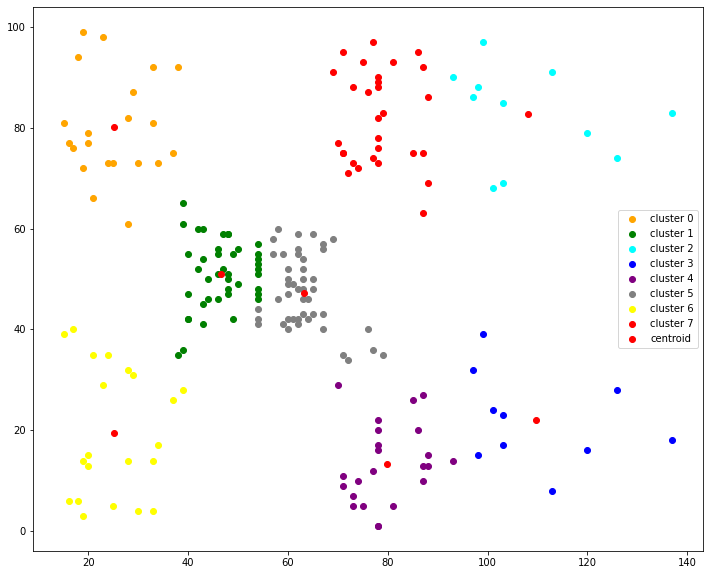

In [105]:
plt.figure(figsize=(12,10))
plt.scatter(df0['income'], df0['scores'], color='orange', label='cluster 0')
plt.scatter(df1['income'], df1['scores'], color='green', label='cluster 1')
plt.scatter(df2['income'], df2['scores'], color='cyan', label='cluster 2')
plt.scatter(df3['income'], df3['scores'], color='blue', label='cluster 3')
plt.scatter(df4['income'], df4['scores'], color='purple', label='cluster 4')
plt.scatter(df5['income'], df5['scores'], color='gray', label='cluster 5')
plt.scatter(df6['income'], df6['scores'], color='yellow', label='cluster 6')
plt.scatter(df7['income'], df7['scores'], color='red', label='cluster 7')
plt.scatter(center1[:,0], center1[:,1], color='red', label='centroid')
plt.legend()


In [106]:
from sklearn.cluster import KMeans

In [107]:
wcss = []
clusters = range(1,16)
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['scores', 'income']])
    wcss.append(kmeans.inertia_) # sum of squared distances

In [108]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25018.57633477634,
 21806.81299869546,
 19656.498170168546,
 17602.19046838677,
 16124.47187864318,
 14575.968760309459,
 13112.449273345701,
 12217.590823307124]

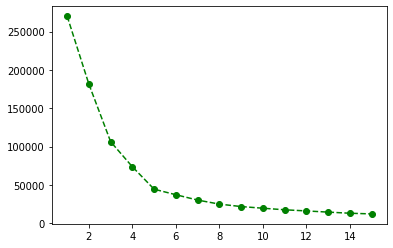

In [109]:
plt.plot(clusters, wcss, 'go--')

In [110]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from kneed import KneeLocator

In [112]:
kn = KneeLocator(clusters,wcss,curve='convex',direction='decreasing')

In [113]:
kn.knee

5

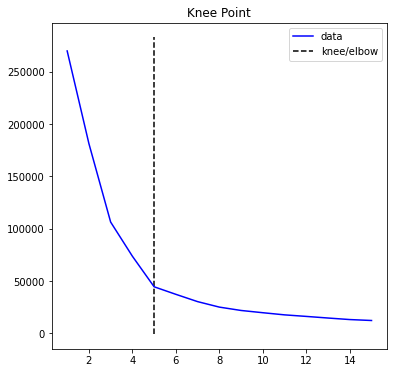

In [114]:
kn.plot_knee()

K = 5; cluster=5

In [115]:
kmean2 = cluster.KMeans(n_clusters=kn.knee)

In [116]:
kmean2

KMeans(n_clusters=5)

In [117]:
df['new clusters'] = kmean2.fit_predict(df[['income', 'scores']])

In [118]:
df.head()

,Gender,age,income,scores,predicted cluster,new clusters
0,Male,19,15,39,6,4
1,Male,21,15,81,0,0
2,Female,20,16,6,6,4
3,Female,23,16,77,0,0
4,Female,31,17,40,6,4


In [119]:
df0 = df[df['new clusters'] == 0]
df1 = df[df['new clusters'] == 1]
df2 = df[df['new clusters'] == 2]
df3 = df[df['new clusters'] == 3]
df4 = df[df['new clusters'] == 4]

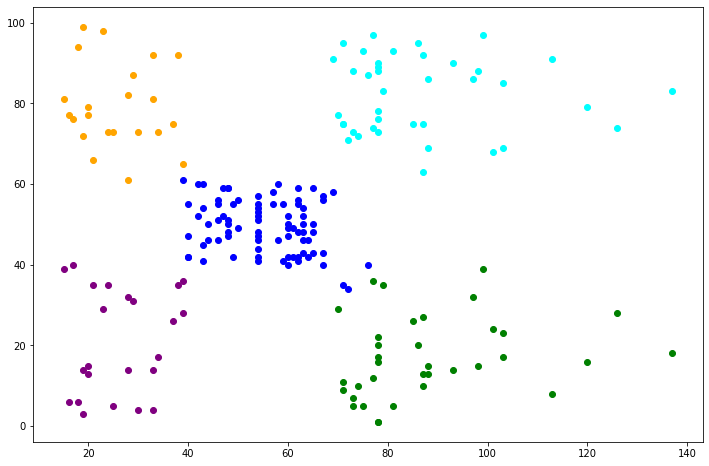

In [120]:
plt.figure(figsize=(12,8))
plt.scatter(df0['income'], df0['scores'], color='orange', label='cluster 0')
plt.scatter(df1['income'], df1['scores'], color='green', label='cluster 1')
plt.scatter(df2['income'], df2['scores'], color='cyan', label='cluster 2')
plt.scatter(df3['income'], df3['scores'], color='blue', label='cluster 3')
plt.scatter(df4['income'], df4['scores'], color='purple', label='cluster 4')

In [121]:
centers = kmean2.cluster_centers_

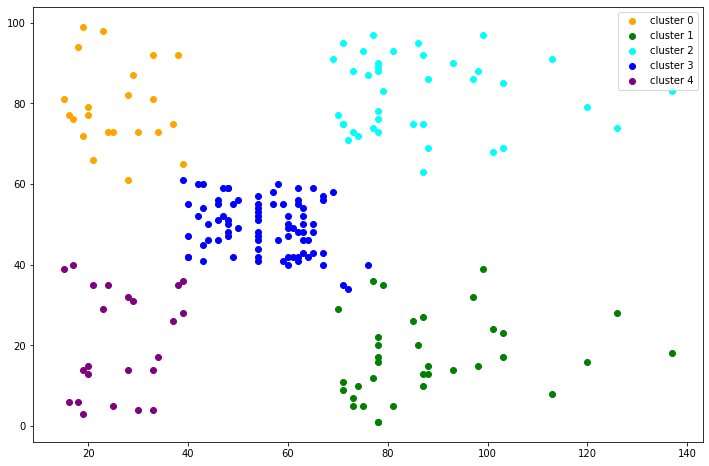

In [122]:
plt.figure(figsize=(12,8))
plt.scatter(df0['income'], df0['scores'], color='orange', label='cluster 0')
plt.scatter(df1['income'], df1['scores'], color='green', label='cluster 1')
plt.scatter(df2['income'], df2['scores'], color='cyan', label='cluster 2')
plt.scatter(df3['income'], df3['scores'], color='blue', label='cluster 3')
plt.scatter(df4['income'], df4['scores'], color='purple', label='cluster 4')

plt.legend()

In [123]:
kmean2.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

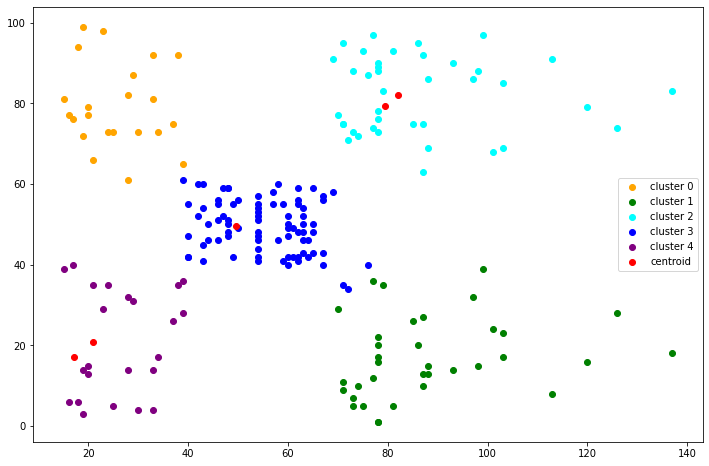

In [124]:
plt.figure(figsize=(12,8))
plt.scatter(df0['income'], df0['scores'], color='orange', label='cluster 0')
plt.scatter(df1['income'], df1['scores'], color='green', label='cluster 1')
plt.scatter(df2['income'], df2['scores'], color='cyan', label='cluster 2')
plt.scatter(df3['income'], df3['scores'], color='blue', label='cluster 3')
plt.scatter(df4['income'], df4['scores'], color='purple', label='cluster 4')

plt.scatter(centers[:,1], centers[:,1], color='red', label='centroid')
plt.legend()

In [125]:
kmean2.predict([[14,40]])

array([4], dtype=int32)